Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6050 - accuracy: 0.8413 - val_loss: 0.3033 - val_accuracy: 0.9174
Epoch 2/5
1719/1719 [================

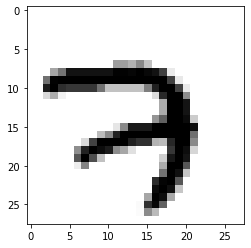

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
mnist = tf.keras.datasets.mnist
(X_train_total, Y_train_total),(X_test,Y_test) = mnist.load_data()
X_train_total.shape
Y_train_total.shape
X_train_total.dtype
X_valid, X_train = X_train_total[:5000]/255. , X_train_total[5000:]/255.  
Y_valid, Y_train = Y_train_total[:5000] , Y_train_total[5000:] 
plt.imshow(X_train[0], cmap = "binary")
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]
model_clf = tf.keras.models.Sequential(LAYERS)
model_clf.layers
model_clf.summary()
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]
model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)
EPOCHS = 5
VALIDATION_SET = (X_valid, Y_valid)

history = model_clf.fit(X_train, Y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)